# Prosper loan data
## by by Hassan Reda

## Investigation Overview

I'm most interested in seeing how the occupation,original loan amount, stated monthly income features correlate with each other to better predict the loan status of a loan.

I expect some features such as borrower APR, Home ownership, no of credit lines,revolving credit balance and total trades to have an effect on the correlation.

## Dataset Overview

There are 9228897 cells in the dataset with 113937 rows and 81 columns, most columns contain numeric variables.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
#loading into the dataframe
loandata=pd.read_csv('ProsperLoanData.csv')

## Distribution of loan amounts 

The is non uniformal with a peak at 4k usd and many frequency spikes at multiples of 5k usd, plotting on a log scale and removing outliers

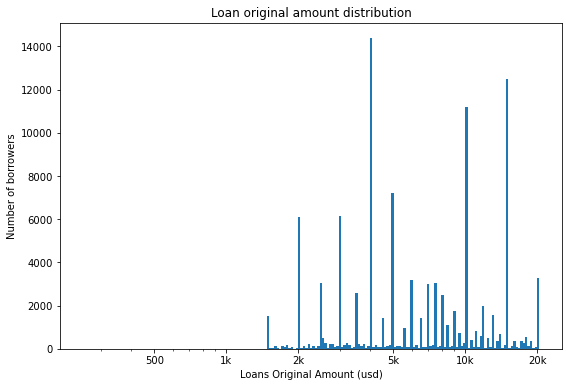

In [16]:
x=loandata['LoanOriginalAmount']
x=x[x.between(x.quantile(0.05),x.quantile(0.95))]
log_binsize=0.01
bins = 10 ** np.arange(2.4, np.log10(x.max())+log_binsize, log_binsize)
plt.figure(figsize=[9,6])
plt.hist(x=x,bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Loans Original Amount (usd)')
plt.ylabel('Number of borrowers')
plt.title('Loan original amount distribution')
plt.show()

## Occupation and Loan amount

Student loans combined compose the biggest sole borrower type. Most Occupations have average loans that are less than 5k and close in value while some occupations such as 'judge' had an average over 10k usd.

Text(0.5, 1.0, 'Occupation and loan original amount')

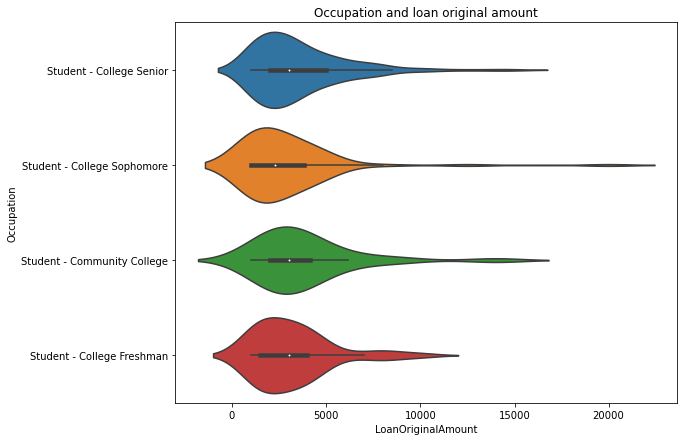

In [17]:
one=loandata[(loandata['Occupation']=='Student - College Senior')|(loandata['Occupation'] == 'Student - Community College') | (loandata['Occupation']=='Student - College Freshman')|(loandata['Occupation']=='Student - College Sophomore')]
plt.figure(figsize=[9,7])
sb.violinplot(data=one,x='LoanOriginalAmount',y='Occupation').set_title('Occupation and loan original amount')

Text(0.5, 1.0, 'Occupation and loan original amount')

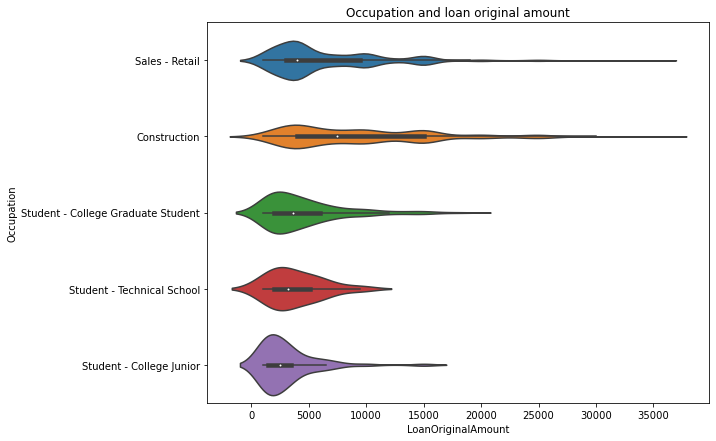

In [18]:
plt.figure(figsize=[9,7])
two=loandata[(loandata['Occupation']=='Student - College Graduate Student')|(loandata['Occupation']=='Student - Technical School')|(loandata['Occupation']=='Student - College Junior')|(loandata['Occupation']=='Construction')|(loandata['Occupation']=='Sales - Retail')]
sb.violinplot(data=two,x='LoanOriginalAmount',y='Occupation').set_title('Occupation and loan original amount')

Text(0.5, 1.0, 'Occupation and loan original amount')

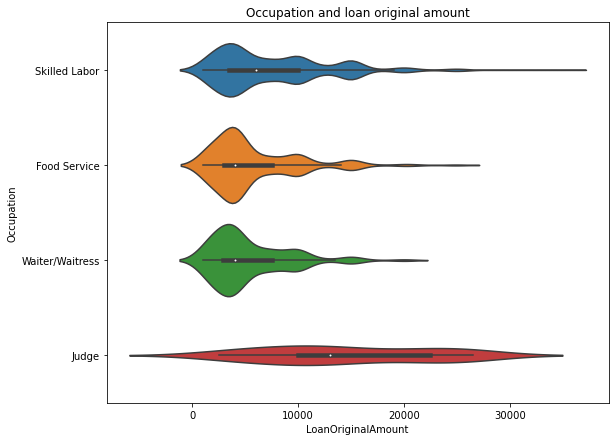

In [19]:
plt.figure(figsize=[9,7])
three=loandata[(loandata['Occupation']=='Skilled Labor')|(loandata['Occupation'] == 'Food Service') | (loandata['Occupation']=='Waiter/Waitress')|(loandata['Occupation']=='Judge')]

sb.violinplot(data=three,x='LoanOriginalAmount',y='Occupation').set_title('Occupation and loan original amount')

## Distribution of loan status 
Removing "current" loan status as it is not informative.
The plot shows how loans that are not delivered compose a big percentage of the total loans

Text(0.5, 1.0, 'Loan Status distribution')

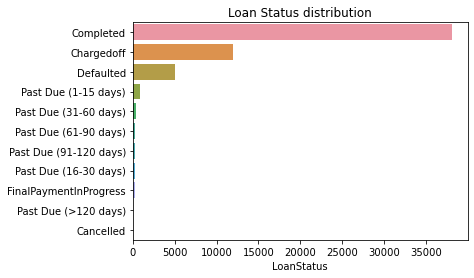

In [20]:
x=loandata['LoanStatus'][loandata['LoanStatus']!='Current']
x=x.value_counts()

sb.barplot(x=x,y=x.index).set_title('Loan Status distribution')

## Occupation and loan status

The figure shows that there is a wide variety between borrowers jobs and not succeeding in delivering loans payments, highest Occupations would be (other,professional,sales-commission,sales-retail) it is advisable not to use "other" and "professional" occupations as they would themselves include different occupations aswell as the "nan" occupation.

1-Most borrowers who work in sales get chargedoff but their majority don't get defaulted.

2-Although the number of borrowers who get defaulted are less than ones who are chargedoff but they are both correlated in the same occupation.

3-Some occupations such as "Dentist" and "Construction" didn't get chargedoff while other occupations as "Attorney" and "biologist" didn't get defaulted, Judge had nan values for both statuses and didn't get displayed.

4-Most occupations that get defaulted and charged off are of an unstable nature and would likely be jobs that depends on gigs or short contracts.

Text(0.5, 1.0, 'Occupation and loan Status')

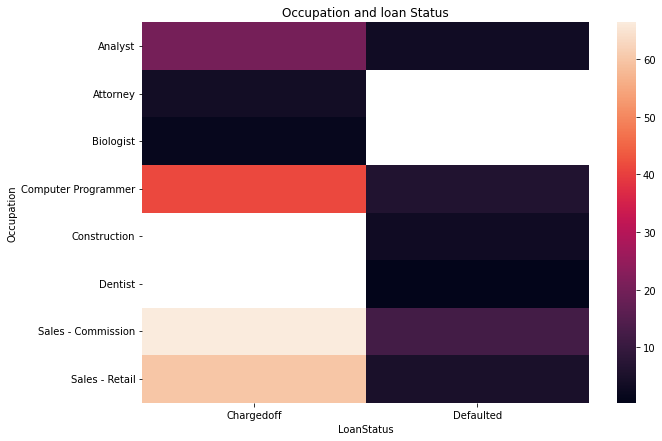

In [21]:
x = loandata[(loandata['LoanStatus']=='Defaulted')|(loandata['LoanStatus']=='Chargedoff')]

defonly=loandata[(loandata['LoanStatus']=='Defaulted')]
defonlyratio=(defonly['Occupation'].value_counts().sort_index())/(loandata['Occupation'].value_counts().sort_index())


charonly=loandata[(loandata['LoanStatus']=='Chargedoff')]
charonlyratio=(charonly['Occupation'].value_counts().sort_index())/(loandata['Occupation'].value_counts().sort_index())



x =pd.DataFrame(data=[x['Occupation'],x['LoanStatus']]).transpose()
x=x.groupby(['Occupation','LoanStatus'],dropna=False).size().reset_index(name='Count')

x=x.pivot('Occupation','LoanStatus','Count')
x.sort_values(by='Occupation')

valuess=[]
for z in defonlyratio:
    valuess.append(z)
defratio=pd.Series(valuess)

valuesss=[]
for z in charonlyratio:
    valuesss.append(z)
    
chargedratio=pd.Series(valuesss)


x['chargedratio']=chargedratio.values
x['defaultedratio']=defratio.values

x['Chargedoff']=x['Chargedoff']*x['chargedratio']
x['Defaulted']=x['Defaulted']*x['defaultedratio']
x.drop(columns=['defaultedratio','chargedratio'],inplace=True)

x=x[(x.index=='Sales - Retail')|(x.index=='Sales - Commission')|(x.index=='Dentist')|(x.index=='Construction')|(x.index=='Attorney')|(x.index=='Biologist')|(x.index=='Computer Programmer')|(x.index=='Analyst')]

plt.figure(figsize=[10,7])
sb.heatmap(data=x,robust=True).set_title('Occupation and loan Status')

## Occupation, LoanStatus and Loan Original Amount

The loan amount and stated monthly income facetgrid plots distribution are mostly nonuniform distributions with varying frequency peaks and means depending on occupation making every plot unique while having slight commonalities with other plots.

While the dept to income plots has a direct effect on the type of distribution a plot would have.

This indicates that the initial expectations that monthly income or loan amounts would have a correlation with loan status was wrong but instead the data shows that dept to income ratio has correlation with loan status that is different between each occupation and another
There is a variety between plots maximum and minimum values for all facetgrids.

this variety between some occupations' distributions and commonality between others' while maintaining unique frequency spikes and peaks could be met with creating sets from this plot with each set containing occupations that have common distributions with taking notice the different peaks and medians as 2 or 3 values that distinguish each occupation inside it's set.

Text(0.5, 0.98, 'Occupation, loan status and original loan amount')

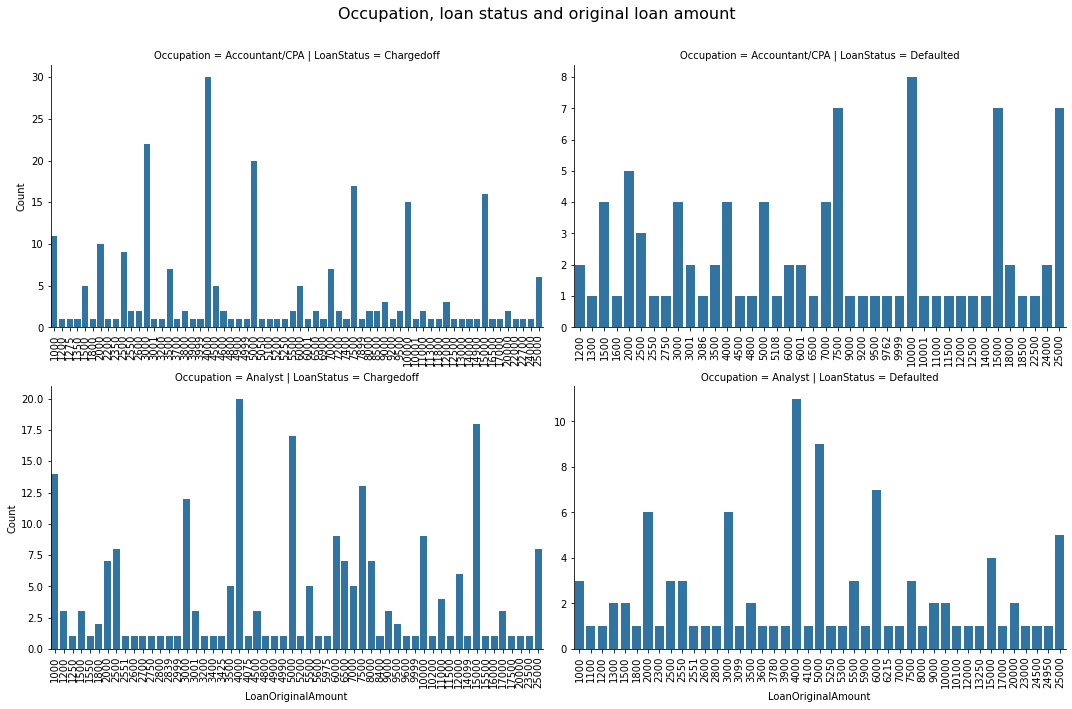

In [22]:
x = loandata[(loandata['LoanStatus']=='Defaulted')|(loandata['LoanStatus']=='Chargedoff')]
x=x.groupby(['Occupation','LoanStatus','LoanOriginalAmount'],dropna=False).size().reset_index(name='Count')

x=x[(x['Occupation']=='Accountant/CPA')|(x['Occupation']=='Analyst')]
g = sb.FacetGrid(x, col='LoanStatus',row='Occupation',sharex=False, sharey=False, height=5, aspect=1.5)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
g.map(sb.barplot, 'LoanOriginalAmount','Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Occupation, loan status and original loan amount', fontsize=16)

Text(0.5, 0.98, 'Occupation, loan status and Dept to income ratio')

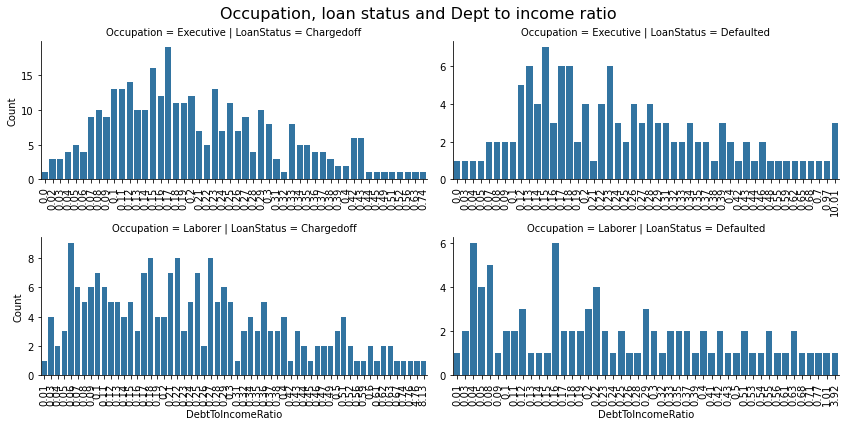

In [34]:
x = loandata[(loandata['LoanStatus']=='Defaulted')|(loandata['LoanStatus']=='Chargedoff')]
x=x.groupby(['Occupation','LoanStatus','DebtToIncomeRatio'],dropna=False).size().reset_index(name='Count')
x=x[(x['Occupation']=='Executive')|(x['Occupation']=='Laborer')]
g = sb.FacetGrid(x, col='LoanStatus',row='Occupation',sharex=False, sharey=False, height=3, aspect=2)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
g.map(sb.barplot, 'DebtToIncomeRatio','Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Occupation, loan status and Dept to income ratio', fontsize=16)

In [37]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 851447 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "E:\2python\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\2python\anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\2python\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "E:\2python\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "E:\2python\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "E:\2python\anaconda\lib